In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the "Titanic Train" dataset. Please make sure you point Pandas to the right location on your system

In [2]:
train = pd.read_csv('/Users/mikelakoju/Documents/Cardiff Metropolitan Uni/2020/CIS7031/Titanic_dataset_Jupyter_notebook/titanic/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dealing with missing data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


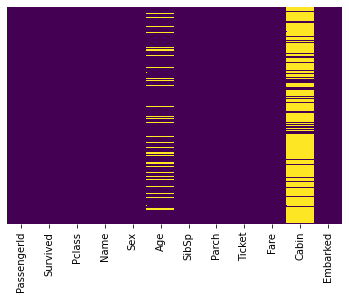

In [5]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### *** We want to fill in missing data for the age column instead of just droping missing data rows

   ### * One way to do this is by filling in the mean age of all the passengers. This is known as Imputation
    
 In statistics, imputation is the process of replacing missing data with substituted values. . <em> Source: Wikipedia </em>\{https://en.wikipedia.org/wiki/Imputation_(statistics)}

# Lets first Visualize the Ages of people in each class

In [15]:
# Just giving a style (optional)
sns.set_style('whitegrid')

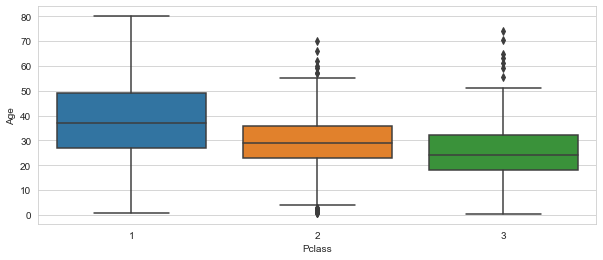

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass',y='Age', data = train)
plt.show()

### ***From the plot above we can see that the wealthier people are in the higher passenger classes and they are also older. This makes sense because generally the older you are, the more disciplined  you are in wealth creation and most likely the wealthier you are

# we can fill in the null values with the average ages by passenger class

### For First Class

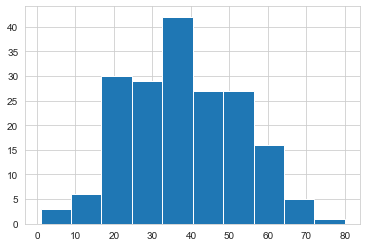

In [30]:
plt.hist(train[train['Pclass']==1]['Age'])
plt.show()

In [25]:
train[train['Pclass']==1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

### For 2nd Class

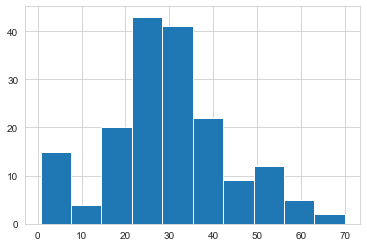

In [31]:
plt.hist(train[train['Pclass']==2]['Age'])
plt.show()

In [32]:
train[train['Pclass']==2]['Age'].describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

### for 3rd Class

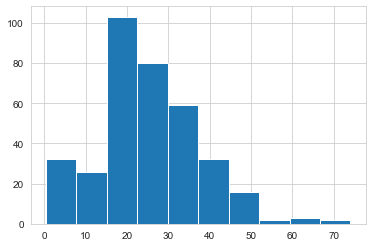

In [33]:
plt.hist(train[train['Pclass']==3]['Age'])
plt.show()

In [34]:
train[train['Pclass']==3]['Age'].describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

# Lets create a function 

In [47]:
#lets create a function 

def fill_age(col):
    Age = col[0]
    Pclass = col[1]
    
    # We checking is there is a null value in Age
    if pd.isnull(Age):
        
        #For passengers in First class
        if Pclass == 1:
            return 37
        #For passengers in 2nd class
        elif Pclass == 2:
            return 29
        #For passengers in 3rd class
        else:
            return 24
        
    else:
        # if no null values, just retun our known Age value
        return Age
    
    

### Now we can use this function we just created.

   #### (1) First, we create a filtered dataframe with just  the Age and Pcalss columns in that order
   #### (2) Then we apply the function and specify that it should be on the columns (axis =1)
   #### (3) we reassign this to the 'Age' column

In [38]:
# now we will apply our function

train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

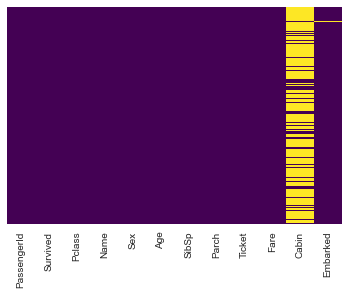

In [40]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# We can now see that we do not have any missing values for 'Age'. However, we see that we have too many missing values for Cabin. We will drop that column.

In [42]:
# take the train dataframe and drop the Cabin colun--- axis =1
train.drop('Cabin',axis=1,inplace=True)

In [43]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


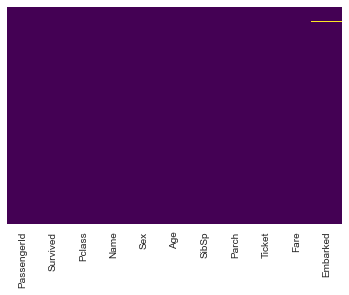

In [44]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Now we can notice that we have just a single line indicating the missing value in 'Embarked' Column. This is so small that we can afford to exclude it from the dataframe / from our Analysis

In [45]:
train.dropna(inplace=True)

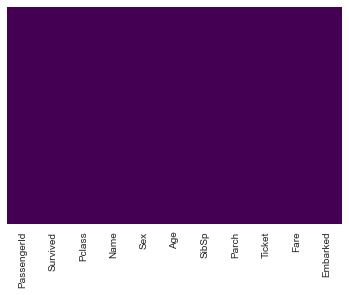

In [46]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')